As part of a UNICEF project whose mission is to improve the well-being of children around the world,
it is necessary to track the impact of students' living conditions between the ages of 15 and 22 on their math score in order to identify at-risk students at an early stage.

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

students = pd.read_csv('stud_math.csv')

In [2]:
students.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [3]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

So we have one dataset with 30 columns.

In [4]:
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


The column names don't make it clear what they mean, so they'll be renamed

In [5]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [6]:
students.columns = ['school', 'sex', 'age', 'address', 'famsize', 'parents_status', 'mother_education', 'father_education', 'mother_job',
                    'father_job', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
                    'school_suppport', 'family_support', 'paid_additional_classes', 'additional_activities', 'nursery', 'studytime, granular', 'higher_education',
                    'internet', 'romantic', 'family_relationship', 'freetime', 'goout', 'health',
                    'absences', 'score']

First let's check whether there are any duplicates in the presented dataset

In [7]:
students.duplicated().value_counts()

False    395
dtype: int64

No duplicated rows

Most of columns have missing data, which is normal in real world. Also there are some continuous variables and some categorical. Let's have a closer look at them.

To perform the analysis, we'll divide all the columns into nominative and numerical ones

In [8]:
list_of_numeric = students.select_dtypes(np.number).columns.tolist()
print(list_of_numeric)

list_of_nominative = students.select_dtypes('object').columns.tolist()
print(list_of_nominative)

['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'studytime, granular', 'family_relationship', 'freetime', 'goout', 'health', 'absences', 'score']
['school', 'sex', 'address', 'famsize', 'parents_status', 'mother_job', 'father_job', 'reason', 'guardian', 'school_suppport', 'family_support', 'paid_additional_classes', 'additional_activities', 'nursery', 'higher_education', 'internet', 'romantic']


It should be noted that despite the fact that some data were assigned to numerical data by this method, they are nominative in their meaning and will be analyzed accordingly

Analysis of numeric columns

Let's start with the main column - 'score'. 

In [9]:
students['score'].value_counts(dropna=False)

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
NaN       6
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Since we have missing values in this column, this will not allow us to analyze them, and it is pointless to fill in the data with other values, because this may affect the final conclusions. In addition, there are too few missing values, so we delete them.

In [10]:
students = students[~students['score'].isnull()]

In [11]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school                   389 non-null    object 
 1   sex                      389 non-null    object 
 2   age                      389 non-null    int64  
 3   address                  374 non-null    object 
 4   famsize                  362 non-null    object 
 5   parents_status           344 non-null    object 
 6   mother_education         386 non-null    float64
 7   father_education         365 non-null    float64
 8   mother_job               370 non-null    object 
 9   father_job               353 non-null    object 
 10  reason                   372 non-null    object 
 11  guardian                 358 non-null    object 
 12  traveltime               361 non-null    float64
 13  studytime                382 non-null    float64
 14  failures                 3

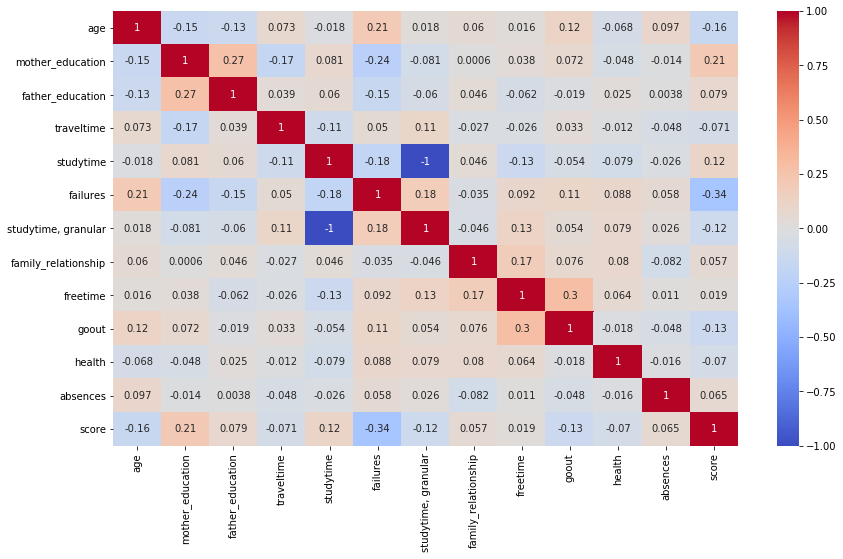

In [12]:
correlation = students.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

We don't have data about the column 'studytime, granular' in the terms of reference. In addition, this column is completely negatively correlated with the column 'studytime', so we delete the column 'studytime, granular' .

In [13]:
students.drop(['studytime, granular'], inplace=True, axis=1)

Let's look at the column 'age' and figure out is there students older than 22 or younger then 15, wich is not appropiate with our conditions

In [14]:
students.age.describe()

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

The data meets the conditions, we will check them for outliers

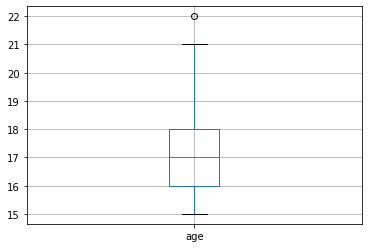

In [15]:
students.boxplot(column=['age'])

In [16]:
def find_outliers(x):  # Function to show boundaries of outliers
    if x.dtype == 'int64' or x.dtype == 'float64':
        print('25th percentile: {},'.format(x.quantile(0.25)),
              '75th percentile: {},'.format(x.quantile(0.75)),
              "IQR: {}, ".format(x.quantile(
                  0.75) - x.quantile(0.25)),
              "The boundaries of outliers: [{f}, {l}].".format(f=(x.quantile(0.25)) - 1.5*(x.quantile(0.75) - x.quantile(0.25)), l=(x.quantile(0.75)) + 1.5*(x.quantile(0.75) - x.quantile(0.25))))

In [17]:
find_outliers(students.age)

25th percentile: 16.0, 75th percentile: 18.0, IQR: 2.0,  The boundaries of outliers: [13.0, 21.0].


We have two outliers in dataset, let's look at them closer

In [18]:
students[students['age'] == 21]

,school,sex,age,address,famsize,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,traveltime,studytime,failures,school_suppport,family_support,paid_additional_classes,additional_activities,nursery,higher_education,internet,romantic,family_relationship,freetime,goout,health,absences,score
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0


In [19]:
students.describe()

,age,mother_education,father_education,traveltime,studytime,failures,family_relationship,freetime,goout,health,absences,score
count,389.000000,386.000000,365.000000,361.000000,382.000000,367.000000,362.000000,380.000000,382.000000,374.000000,378.000000,389.000000
mean,16.673522,2.766839,2.627397,1.434903,2.036649,0.326975,3.930939,3.223684,3.094241,3.529412,7.320106,52.262211
std,1.265662,1.094277,2.241790,0.692660,0.847239,0.729479,0.931554,0.993364,1.116104,1.402006,23.615525,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [20]:
find_outliers(students.score)

25th percentile: 40.0, 75th percentile: 70.0, IQR: 30.0,  The boundaries of outliers: [-5.0, 115.0].


As you can see, these outliers do not affect the appearance of outliers in the tolerable column 'score', and since they fit the specified conditions, so that if they are deleted, the conditions will not be met, we leave these values. For the purpose not deleting them, we'll now fill empty values in this row

In [21]:
students['guardian'].value_counts()

mother    248
father     86
other      24
Name: guardian, dtype: int64

In [22]:
students['school_suppport'].value_counts()

no     331
yes     49
Name: school_suppport, dtype: int64

In [23]:
students['higher_education'].value_counts()

yes    350
no      19
Name: higher_education, dtype: int64

In [24]:
students.loc[students.age == 21, 'guardian'] = 'mother'
students.loc[students.age == 21, 'school_suppport'] = 'no'
students.loc[students.age == 21, 'higher_education'] = 'yes'

In [25]:
students[students['age'] == 21]

,school,sex,age,address,famsize,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,traveltime,studytime,failures,school_suppport,family_support,paid_additional_classes,additional_activities,nursery,higher_education,internet,romantic,family_relationship,freetime,goout,health,absences,score
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,no,yes,no,no,5.0,5.0,3.0,3.0,3.0,35.0


In [26]:
students.head(5)

,school,sex,age,address,famsize,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,traveltime,studytime,failures,school_suppport,family_support,paid_additional_classes,additional_activities,nursery,higher_education,internet,romantic,family_relationship,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [27]:
students.mother_education.value_counts(dropna=False)

4.0    131
2.0    100
3.0     96
1.0     56
0.0      3
NaN      3
Name: mother_education, dtype: int64

As we have only 2 missed values, we'll fill them with mode value

In [28]:
students.mother_education.value_counts()
students['mother_education'] = students['mother_education'].fillna(
    students.mother_education.median())

As we coul see earlier, values of column 'mother_education' are highly correlated with values of column 'father_education', so we can fill empty values of the last one with those in first one.

In [29]:
students['father_education'] = students['father_education'].fillna(
    students['mother_education'])

Let's check the result

In [30]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school                   389 non-null    object 
 1   sex                      389 non-null    object 
 2   age                      389 non-null    int64  
 3   address                  374 non-null    object 
 4   famsize                  362 non-null    object 
 5   parents_status           344 non-null    object 
 6   mother_education         389 non-null    float64
 7   father_education         389 non-null    float64
 8   mother_job               370 non-null    object 
 9   father_job               353 non-null    object 
 10  reason                   372 non-null    object 
 11  guardian                 359 non-null    object 
 12  traveltime               361 non-null    float64
 13  studytime                382 non-null    float64
 14  failures                 3

In [31]:
students.father_education.value_counts(dropna=False)

2.0     109
3.0     101
4.0      98
1.0      78
0.0       2
40.0      1
Name: father_education, dtype: int64

We can see an unappropriate value, so we'll delete this row

In [32]:
students = students.loc[students['father_education'] != 40.0]

In [33]:
find_outliers(students.father_education)
find_outliers(students.mother_education)

25th percentile: 2.0, 75th percentile: 4.0, IQR: 2.0,  The boundaries of outliers: [-1.0, 7.0].
25th percentile: 2.0, 75th percentile: 4.0, IQR: 2.0,  The boundaries of outliers: [-1.0, 7.0].


As we see in these two columns no outliers

Let's check other columns and fill null values

In [34]:
students['traveltime'].value_counts(dropna=False)

1.0    239
2.0     94
NaN     28
3.0     20
4.0      7
Name: traveltime, dtype: int64

In [35]:
find_outliers(students.traveltime)

25th percentile: 1.0, 75th percentile: 2.0, IQR: 1.0,  The boundaries of outliers: [-0.5, 3.5].


In [36]:
students[students['traveltime'] > 3.5]

,school,sex,age,address,famsize,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,traveltime,studytime,failures,school_suppport,family_support,paid_additional_classes,additional_activities,nursery,higher_education,internet,romantic,family_relationship,freetime,goout,health,absences,score
61,GP,F,16,U,GT3,T,1.0,1.0,services,services,course,father,4.0,1.0,0.0,yes,NaN,no,yes,no,yes,yes,yes,5.0,5.0,5.0,5.0,6.0,55.0
108,GP,M,15,R,GT3,NaN,4.0,4.0,other,other,home,father,4.0,4.0,NaN,no,yes,yes,yes,yes,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
149,GP,M,15,U,LE3,NaN,2.0,1.0,services,other,course,mother,4.0,1.0,3.0,no,NaN,no,no,yes,NaN,yes,no,4.0,5.0,5.0,5.0,0.0,50.0
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,course,NaN,4.0,2.0,3.0,no,no,NaN,yes,yes,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0
228,GP,M,18,U,NaN,T,2.0,1.0,at_home,other,course,mother,4.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,yes,4.0,3.0,2.0,3.0,14.0,45.0
327,GP,M,17,R,GT3,T,2.0,2.0,services,other,course,mother,4.0,1.0,0.0,no,NaN,no,no,yes,yes,yes,no,4.0,4.0,5.0,4.0,8.0,50.0
375,MS,F,18,R,GT3,T,1.0,1.0,other,other,home,mother,4.0,3.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,3.0,2.0,4.0,2.0,50.0


As we see these outliers don't have much influence on the appearance of values in column 'score', so we leave them

In [37]:
students['traveltime'] = students['traveltime'].fillna(
    students.traveltime.median())

In [38]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school                   388 non-null    object 
 1   sex                      388 non-null    object 
 2   age                      388 non-null    int64  
 3   address                  373 non-null    object 
 4   famsize                  361 non-null    object 
 5   parents_status           344 non-null    object 
 6   mother_education         388 non-null    float64
 7   father_education         388 non-null    float64
 8   mother_job               369 non-null    object 
 9   father_job               352 non-null    object 
 10  reason                   371 non-null    object 
 11  guardian                 358 non-null    object 
 12  traveltime               388 non-null    float64
 13  studytime                381 non-null    float64
 14  failures                 3

In [39]:
students['failures'].value_counts(dropna=False)

0.0    289
1.0     48
NaN     22
2.0     15
3.0     14
Name: failures, dtype: int64

In [40]:
students['failures'] = students['failures'].fillna(students.failures.median())

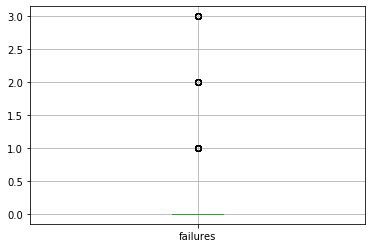

In [41]:
students.boxplot(column=['failures'])

In [42]:
students.groupby(by='failures')['score'].mean()

failures
0.0    56.109325
1.0    40.000000
2.0    32.333333
3.0    29.642857
Name: score, dtype: float64

As we can see this column has an influence on the column 'Score' so we can't delete outliers. Besides, it is normal that it's not much students have a lot of failures 

In [43]:
students['studytime'].value_counts(dropna=False)

2.0    189
1.0    103
3.0     62
4.0     27
NaN      7
Name: studytime, dtype: int64

In [44]:
find_outliers(students.studytime)

25th percentile: 1.0, 75th percentile: 2.0, IQR: 1.0,  The boundaries of outliers: [-0.5, 3.5].


In [45]:
students.groupby(by='studytime')['score'].mean()

studytime
1.0    49.466019
2.0    50.820106
3.0    57.741935
4.0    56.296296
Name: score, dtype: float64

As we can see this column has an influence on the column 'Score' so we can't delete outliers. Besides, the difference between borders of outliers and outliers values is not big.

In [46]:
students['studytime'] = students['studytime'].fillna(
    students['studytime'].median())

In [47]:
students['family_relationship'].value_counts(dropna=False)

 4.0    178
 5.0     96
 3.0     62
 NaN     27
 2.0     17
 1.0      7
-1.0      1
Name: family_relationship, dtype: int64

We can see a mistake value here so we delete it.

In [48]:
students = students.loc[students['family_relationship'] != -1.0]

In [49]:
find_outliers(students.family_relationship)

25th percentile: 4.0, 75th percentile: 5.0, IQR: 1.0,  The boundaries of outliers: [2.5, 6.5].


In [50]:
students.groupby(by='family_relationship')['score'].median()

family_relationship
1.0    60.0
2.0    55.0
3.0    55.0
4.0    52.5
5.0    55.0
Name: score, dtype: float64

In [51]:
students['family_relationship'] = students['family_relationship'].fillna(
    students['family_relationship'].median())

In [52]:
students['freetime'].value_counts(dropna=False)

3.0    152
4.0    110
2.0     61
5.0     37
1.0     18
NaN      9
Name: freetime, dtype: int64

In [53]:
students.groupby(by='freetime')['score'].median()

freetime
1.0    50.0
2.0    60.0
3.0    50.0
4.0    55.0
5.0    60.0
Name: score, dtype: float64

In [54]:
students['freetime'] = students['freetime'].fillna(3.0)

In [55]:
students['goout'].value_counts(dropna=False)

3.0    126
2.0     99
4.0     81
5.0     51
1.0     23
NaN      7
Name: goout, dtype: int64

In [56]:
students.groupby(by='goout')['score'].median()

goout
1.0    55.0
2.0    60.0
3.0    55.0
4.0    50.0
5.0    50.0
Name: score, dtype: float64

In [57]:
students['goout'] = students['goout'].fillna(3.0)

In [58]:
students['health'].value_counts(dropna=False)

5.0    136
3.0     88
4.0     59
1.0     47
2.0     42
NaN     15
Name: health, dtype: int64

In [59]:
students['health'] = students['health'].fillna(5.0)

In [60]:
students['absences']

0        6.0
1        4.0
2       10.0
3        2.0
4        4.0
       ...  
390    212.0
391      3.0
392      3.0
393      0.0
394      5.0
Name: absences, Length: 387, dtype: float64

In [61]:
students['absences'].value_counts(dropna=False)

0.0      110
2.0       60
4.0       51
6.0       30
8.0       20
10.0      17
12.0      12
NaN       11
14.0      11
16.0       7
3.0        7
7.0        6
5.0        5
18.0       5
20.0       4
1.0        3
22.0       3
9.0        3
13.0       2
15.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

In [62]:
students['absences'] = students['absences'].fillna(
    students['absences'].median())

We can see a mistake value here so we delete it.

In [63]:
students = students.loc[students['absences'] != 385.0]

In [64]:
students.head(5)

,school,sex,age,address,famsize,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,traveltime,studytime,failures,school_suppport,family_support,paid_additional_classes,additional_activities,nursery,higher_education,internet,romantic,family_relationship,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Nominative variables

After analysis we desided to delete column School, because this is a cathegorical data, that gives us nothing for analisys because we have no information about these schools (type, rating, etc.)

In [65]:
students.drop(['school'], inplace=True, axis=1)

Updating the list of columns with nominative variables

In [66]:
list_of_nominative = students.select_dtypes('object').columns.tolist()
print(list_of_nominative)

['sex', 'address', 'famsize', 'parents_status', 'mother_job', 'father_job', 'reason', 'guardian', 'school_suppport', 'family_support', 'paid_additional_classes', 'additional_activities', 'nursery', 'higher_education', 'internet', 'romantic']


Sex column has no null values

In [67]:
students['address'].value_counts(dropna=False)

U      288
R       83
NaN     15
Name: address, dtype: int64

In [68]:
students[(students['address'] != 'U') & (
    students['address'] != 'R')]['traveltime'].value_counts()

1.0    10
2.0     5
Name: traveltime, dtype: int64

Let's fill null values on mode value

In [69]:
students['address'] = students['address'].fillna('U')

In [70]:
students['famsize'].value_counts(dropna=False)

GT3    252
LE3    107
NaN     27
Name: famsize, dtype: int64

Let's fill null values on mode value

In [71]:
students['famsize'] = students['famsize'].fillna('GT3')

In [72]:
students['parents_status'].value_counts(dropna=False)

T      307
NaN     43
A       36
Name: parents_status, dtype: int64

Let's fill null values on mode value

In [73]:
students['parents_status'] = students['parents_status'].fillna('T')

In [74]:
students['mother_job'].value_counts(dropna=False)

other       127
services     95
at_home      58
teacher      55
health       32
NaN          19
Name: mother_job, dtype: int64

Let's fill null values on mode value

In [75]:
students['mother_job'] = students['mother_job'].fillna('other')

In [76]:
students.groupby(by='mother_job')['score'].mean()

mother_job
at_home     45.689655
health      60.625000
other       50.273973
services    54.526316
teacher     55.181818
Name: score, dtype: float64

In [77]:
students['father_job'].value_counts(dropna=False)

other       193
services     98
NaN          36
teacher      28
at_home      16
health       15
Name: father_job, dtype: int64

Let's fill null values on mode value

In [78]:
students['father_job'] = students['father_job'].fillna('other')

In [79]:
students['reason'].value_counts(dropna=False)

course        135
reputation    101
home          100
other          33
NaN            17
Name: reason, dtype: int64

Let's fill null values on the other value

In [80]:
students['reason'] = students['reason'].fillna('other')

In [81]:
students['guardian'].value_counts(dropna=False)

mother    247
father     85
NaN        30
other      24
Name: guardian, dtype: int64

Let's fill null values on mode value

In [82]:
students['guardian'] = students['guardian'].fillna('mother')

In [83]:
students['school_suppport'].value_counts(dropna=False)

no     330
yes     48
NaN      8
Name: school_suppport, dtype: int64

Let's fill null values on mode value

In [84]:
students['school_suppport'] = students['school_suppport'].fillna('no')

In [85]:
students['family_support'].value_counts(dropna=False)

yes    214
no     135
NaN     37
Name: family_support, dtype: int64

Let's fill null values on mode value

In [86]:
students['family_support'] = students['family_support'].fillna('yes')

In [87]:
students['paid_additional_classes'].value_counts(dropna=False)

no     195
yes    152
NaN     39
Name: paid_additional_classes, dtype: int64

We have a lot of missed values here so if we delete them we will loose a lot of data, so let's fill null values on mode value

In [88]:
students['paid_additional_classes'] = students['paid_additional_classes'].fillna(
    'no')

In [89]:
students['additional_activities'].value_counts(dropna=False)

yes    191
no     181
NaN     14
Name: additional_activities, dtype: int64

Let's fill null values on mode value

In [90]:
students['additional_activities'] = students['additional_activities'].fillna(
    'yes')

In [91]:
students['nursery'].value_counts(dropna=False)

yes    295
no      76
NaN     15
Name: nursery, dtype: int64

Let's fill null values on mode value

In [92]:
students['nursery'] = students['nursery'].fillna('yes')

In [93]:
students['higher_education'].value_counts(dropna=False)

yes    348
no      19
NaN     19
Name: higher_education, dtype: int64

Let's fill null values on mode value

In [94]:
students['higher_education'] = students['higher_education'].fillna('yes')

In [95]:
students['internet'].value_counts(dropna=False)

yes    297
no      55
NaN     34
Name: internet, dtype: int64

Let's fill null values on mode value

In [96]:
students['internet'] = students['internet'].fillna('yes')

In [97]:
students['romantic'].value_counts(dropna=False)

no     232
yes    123
NaN     31
Name: romantic, dtype: int64

Let's fill null values on mode value

In [98]:
students['romantic'] = students['romantic'].fillna('no')

In [99]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sex                      386 non-null    object 
 1   age                      386 non-null    int64  
 2   address                  386 non-null    object 
 3   famsize                  386 non-null    object 
 4   parents_status           386 non-null    object 
 5   mother_education         386 non-null    float64
 6   father_education         386 non-null    float64
 7   mother_job               386 non-null    object 
 8   father_job               386 non-null    object 
 9   reason                   386 non-null    object 
 10  guardian                 386 non-null    object 
 11  traveltime               386 non-null    float64
 12  studytime                386 non-null    float64
 13  failures                 386 non-null    float64
 14  school_suppport          3

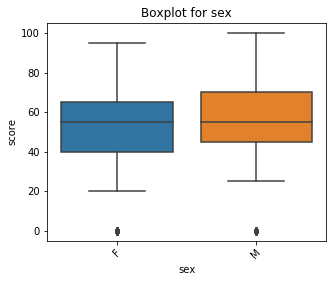

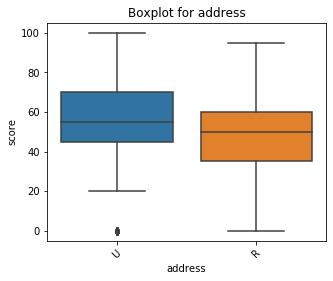

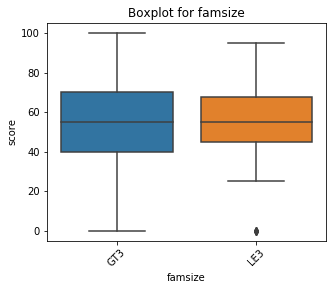

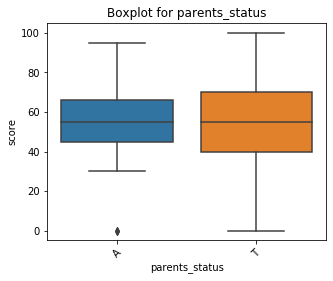

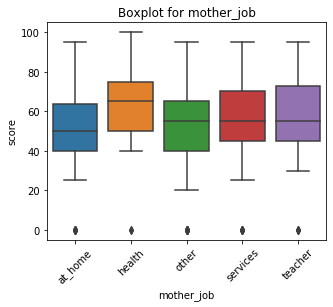

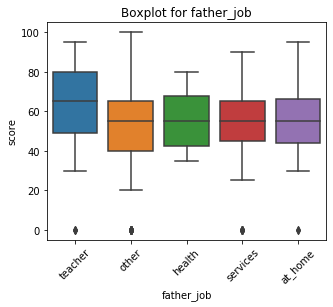

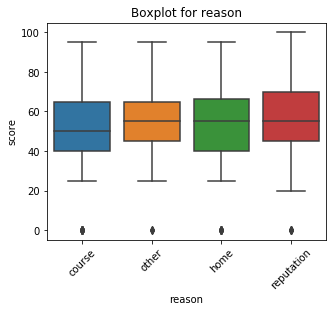

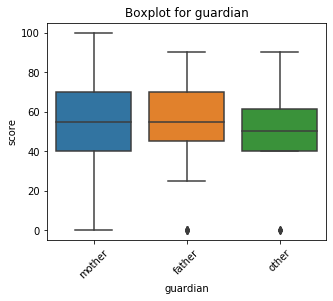

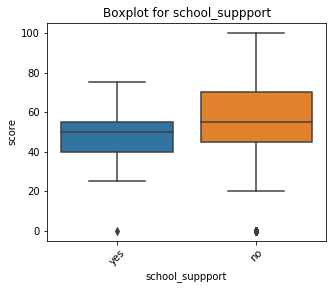

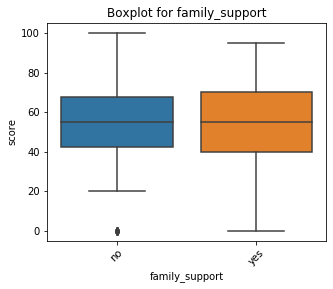

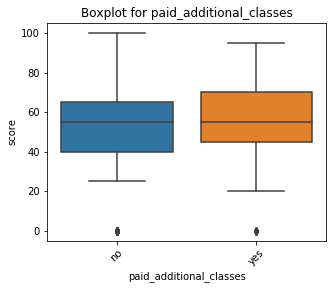

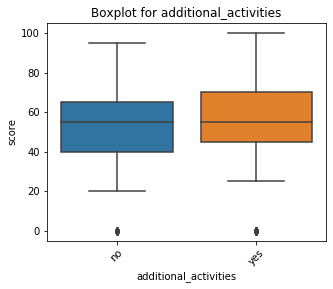

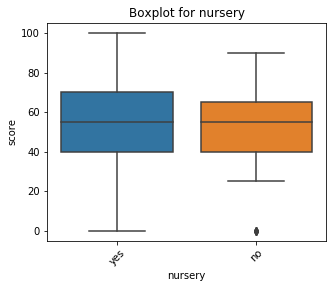

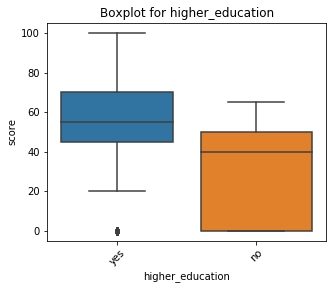

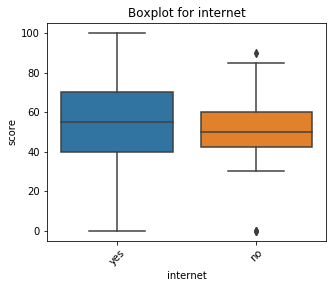

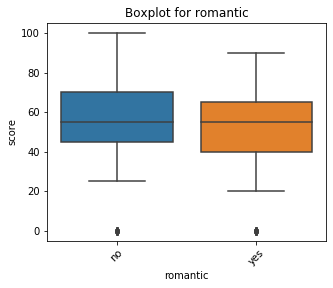

In [100]:
def get_boxplot(column):  # Function to show outliers in boxplot
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


for col in list_of_nominative:
    get_boxplot(col)

As we can see a lot of parameters have an influence on tha main parametr - score.  So we need to make statistics

In [101]:
students.head(5)

,sex,age,address,famsize,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,traveltime,studytime,failures,school_suppport,family_support,paid_additional_classes,additional_activities,nursery,higher_education,internet,romantic,family_relationship,freetime,goout,health,absences,score
0,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Let's update the lists of nominative and numeric columns for further analysis

In [102]:
students.columns

Index(['sex', 'age', 'address', 'famsize', 'parents_status',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'school_suppport', 'family_support', 'paid_additional_classes',
       'additional_activities', 'nursery', 'higher_education', 'internet',
       'romantic', 'family_relationship', 'freetime', 'goout', 'health',
       'absences', 'score'],
      dtype='object')

In [103]:
list_of_numeric = ['age', 'traveltime', 'studytime', 'failures',
                   'freetime', 'goout', 'absences', 'score']

list_of_nominative = ['sex', 'address', 'famsize', 'parents_status',
                      'mother_education', 'father_education', 'mother_job', 'father_job',
                      'reason', 'guardian', 'school_suppport', 'family_support', 'paid_additional_classes',
                      'additional_activities', 'nursery', 'higher_education', 'internet',
                      'romantic', 'family_relationship', 'health']

In [104]:
def get_stat_dif(column):  # Function to count statistics
    cols = students.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # The bonferroni correction
            print('Statistically significant differences were found for the column:', column)
            break


for col in list_of_nominative:
    get_stat_dif(col)

Statistically significant differences were found for the column: sex
Statistically significant differences were found for the column: address
Statistically significant differences were found for the column: mother_education
Statistically significant differences were found for the column: father_education
Statistically significant differences were found for the column: mother_job
Statistically significant differences were found for the column: paid_additional_classes
Statistically significant differences were found for the column: higher_education
Statistically significant differences were found for the column: romantic


In [115]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.04/len(combinations_all):  # The bonferroni correction
            print('Statistically significant differences were found for the column:', column)
            break


for col in list_of_nominative:
    get_stat_dif(col)

Statistically significant differences were found for the column: address
Statistically significant differences were found for the column: mother_education
Statistically significant differences were found for the column: father_education
Statistically significant differences were found for the column: higher_education
Statistically significant differences were found for the column: romantic


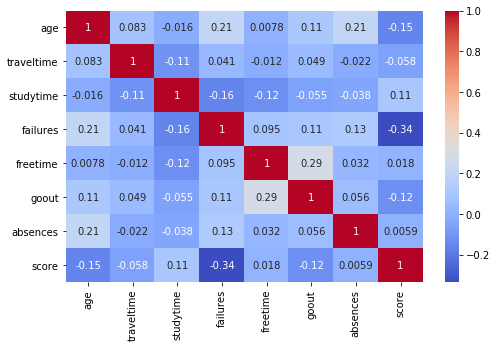

In [106]:
correlation = students[['age', 'traveltime', 'studytime',
                        'failures', 'freetime', 'goout', 'absences', 'score']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [107]:
students.groupby(by='higher_education')['score'].median()

higher_education
no     40.0
yes    55.0
Name: score, dtype: float64

In [108]:
students.groupby(by='mother_education')['score'].median()

mother_education
0.0    75.0
1.0    50.0
2.0    55.0
3.0    50.0
4.0    60.0
Name: score, dtype: float64

In [109]:
students.groupby(by='father_education')['score'].median()

father_education
0.0    65.0
1.0    50.0
2.0    55.0
3.0    50.0
4.0    60.0
Name: score, dtype: float64

In [110]:
students_for_model = students.loc[:, ['sex', 'age', 'address', 'mother_education', 'father_education', 'mother_job',
                                      'studytime', 'failures', 'paid_additional_classes', 'higher_education', 'romantic',  'goout', 'score']]
students_for_model.head()

,sex,age,address,mother_education,father_education,mother_job,studytime,failures,paid_additional_classes,higher_education,romantic,goout,score
0,F,18,U,4.0,4.0,at_home,2.0,0.0,no,yes,no,4.0,30.0
1,F,17,U,1.0,1.0,at_home,2.0,0.0,no,yes,no,3.0,30.0
2,F,15,U,1.0,1.0,at_home,2.0,3.0,no,yes,no,2.0,50.0
3,F,15,U,4.0,2.0,health,3.0,0.0,yes,yes,yes,2.0,75.0
4,F,16,U,3.0,3.0,other,2.0,0.0,yes,yes,no,2.0,50.0


As a result of the exploratory data analysis the impact of student's social conditions on their math scores the following conclusions were obtained:

1. There were a lot of missing values in the data, as well as several erroneous ones. Erroneous values were deleted and the missing ones were replaced.
2. Outliers were detected in many columns, but their analysis did not reveal the need to delete them, so they were left in order to obtain more reliable data for the model.
3. Statistical analysis allows us to conclude that from the nominative variables, the following parameters have the greatest impact on students' math scores: sex (slightly affects the math scores), address, mother_education, father_education (interestingly, the highest number of points are received by students whose parents do not have an education and slightly lower by those whose parents have a higher education), mother_job (slightly affects the math scores, more points are received by students whose mother works in the health sector), paid_additional_classes(interesting, that slightly affects the math scores), higher_education (higher score for students who are going to graduate), romantic (interesting, that significantly affects the math scores)
4. Based on the correlation analysis of numerical variables, math scores are most affected by: 'age', 'studytime', 'failures','goout', 'score'. Interestingly, the most significant influence. Interestingly, the most significant influence is the number of failures (correlation coefficient -0.34) and almost does not affect the number of absences (correlation coefficient 0.0059). It is also interesting that studytime has a low impact on the score (correlation coefficient -0.11)